In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')

In [2]:
with open('./result.csv', 'r') as f:
    results = pd.read_csv(f)
results = results.sort_values(by=['m_id', 'prime'])

In [3]:
e_items = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'Valence', 'Arousal', 'like']
primes = ['none', 'bpm', 'chord', 'lyrics', 'playcount']

In [4]:
nones = results[results['prime'] == 'none']
bpms = results[results['prime'] == 'bpm']
chords = results[results['prime'] == 'chord']
lyrics = results[results['prime'] == 'lyrics']
playcounts = results[results['prime'] == 'playcount']

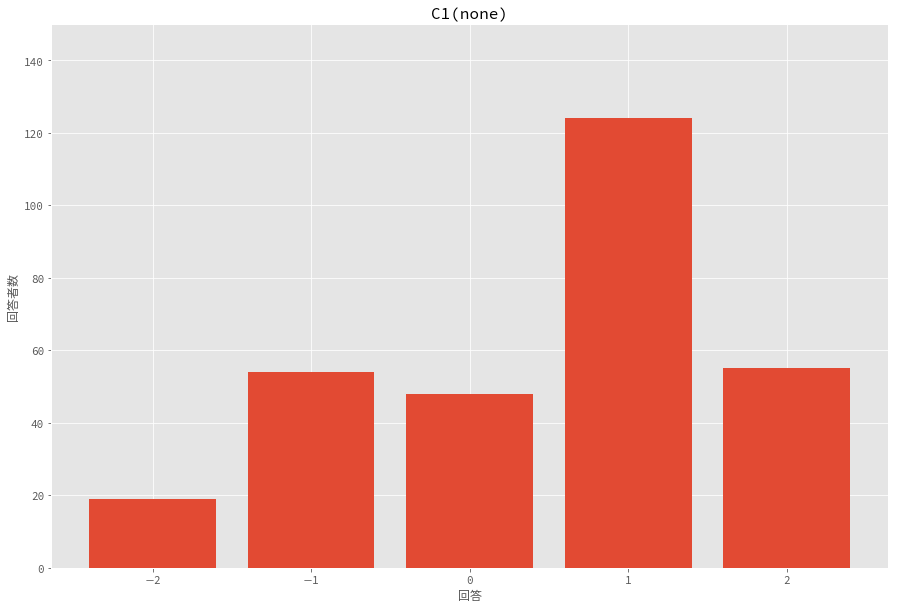

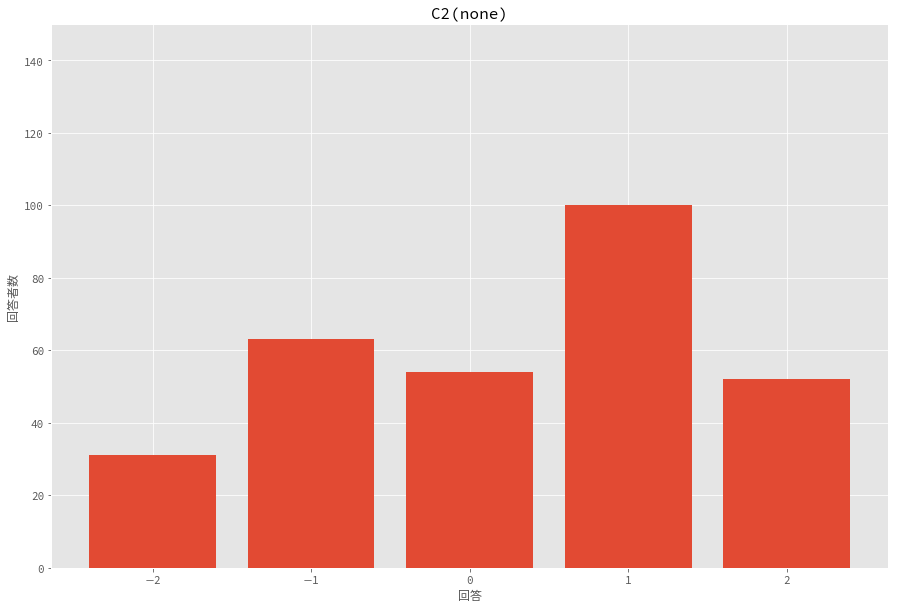

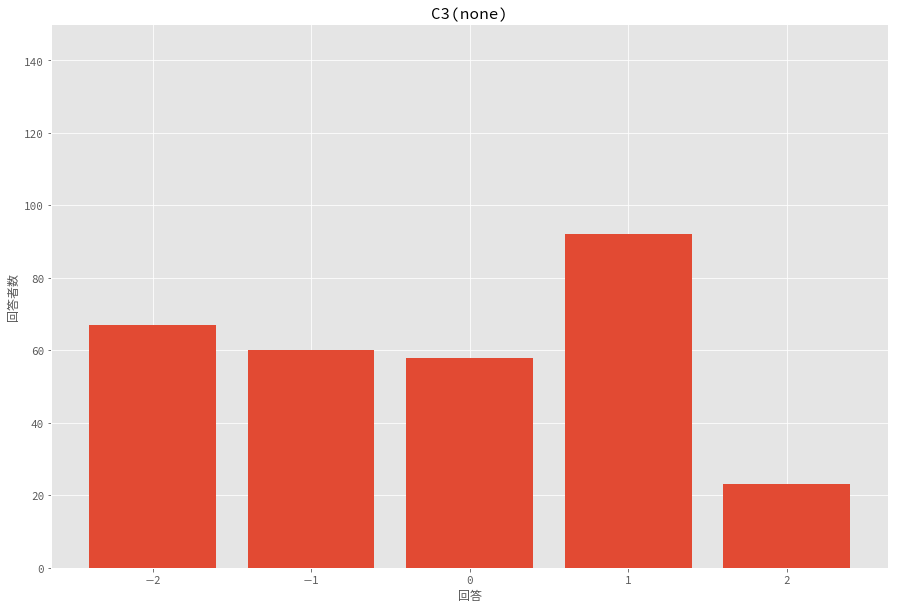

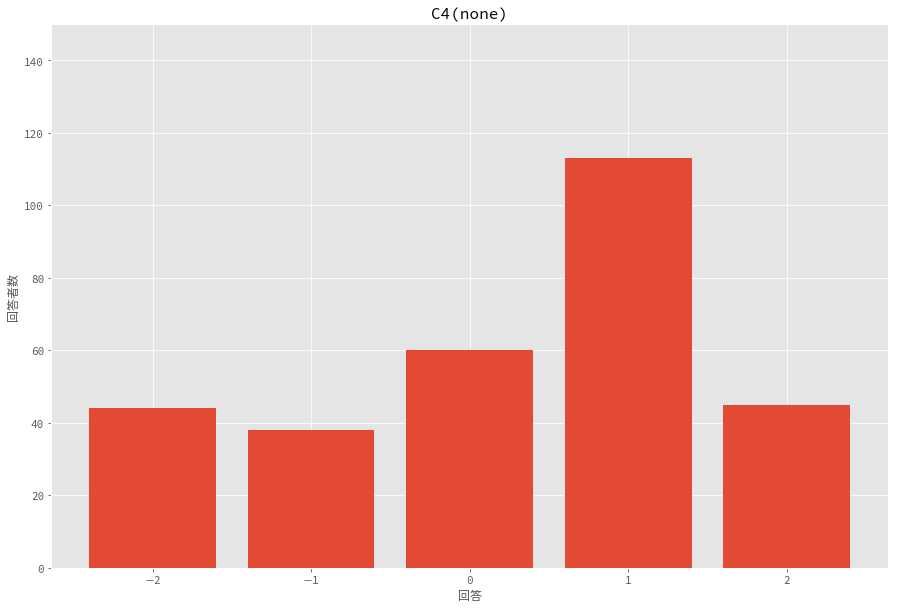

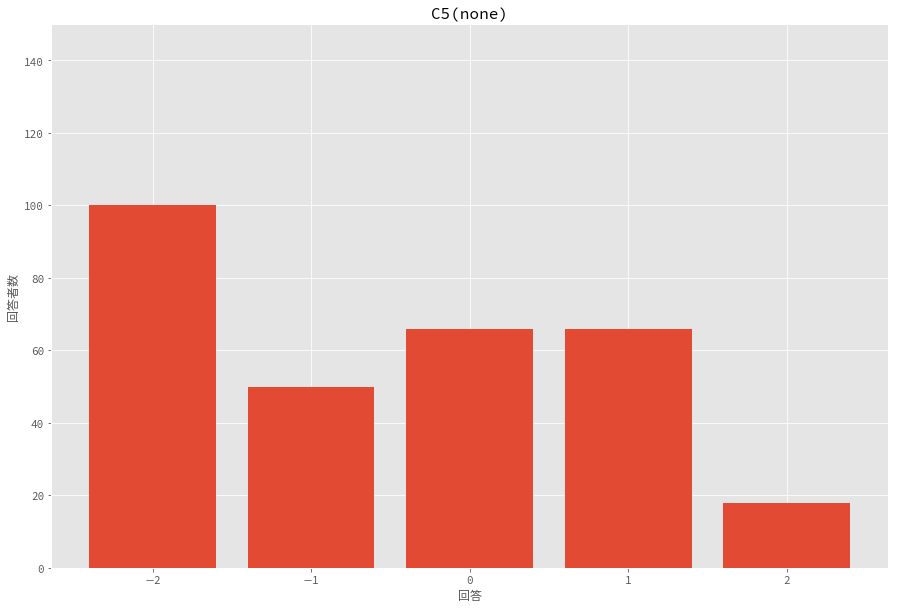

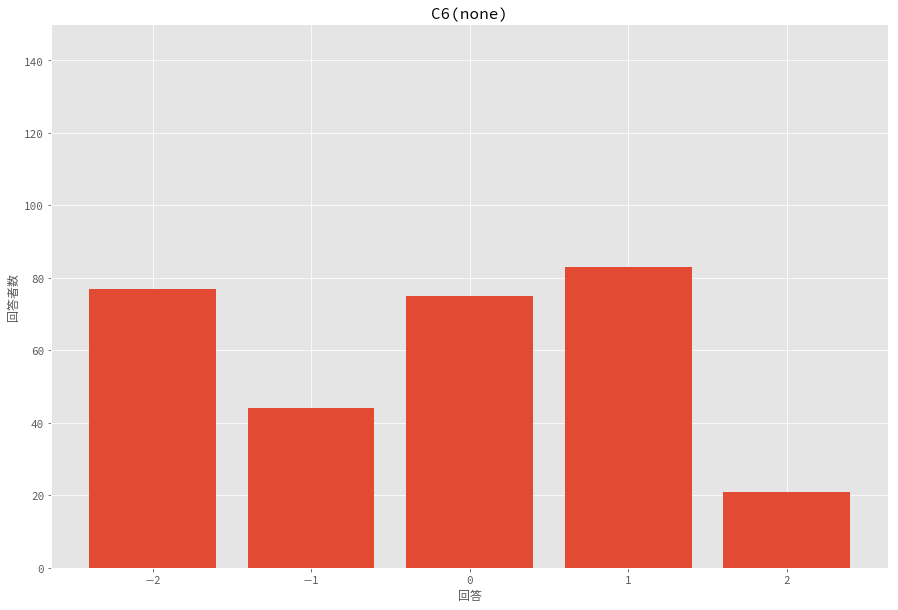

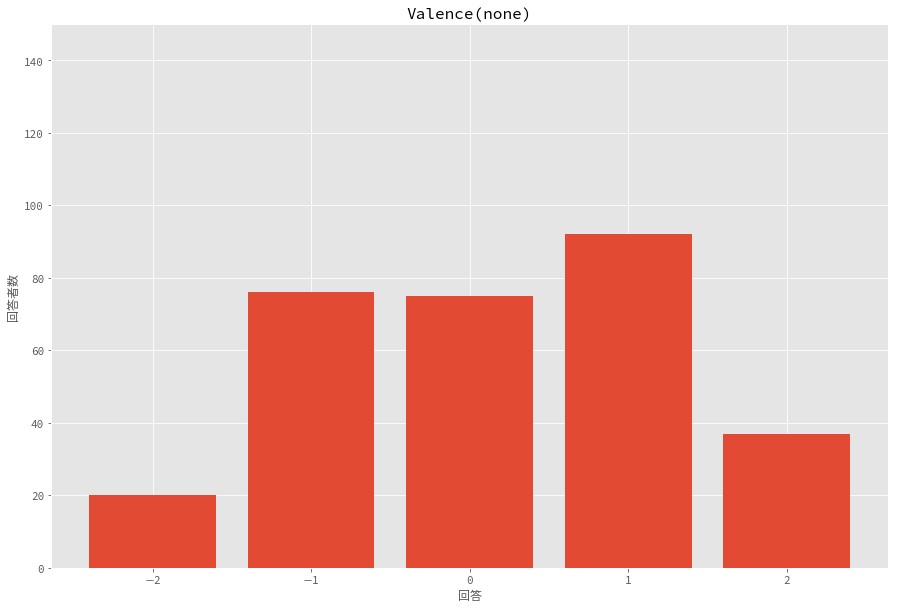

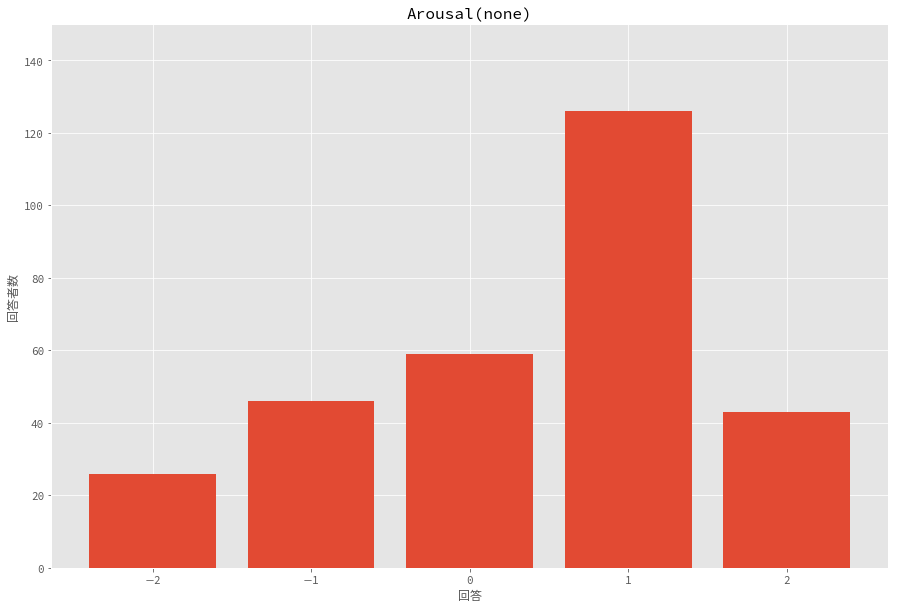

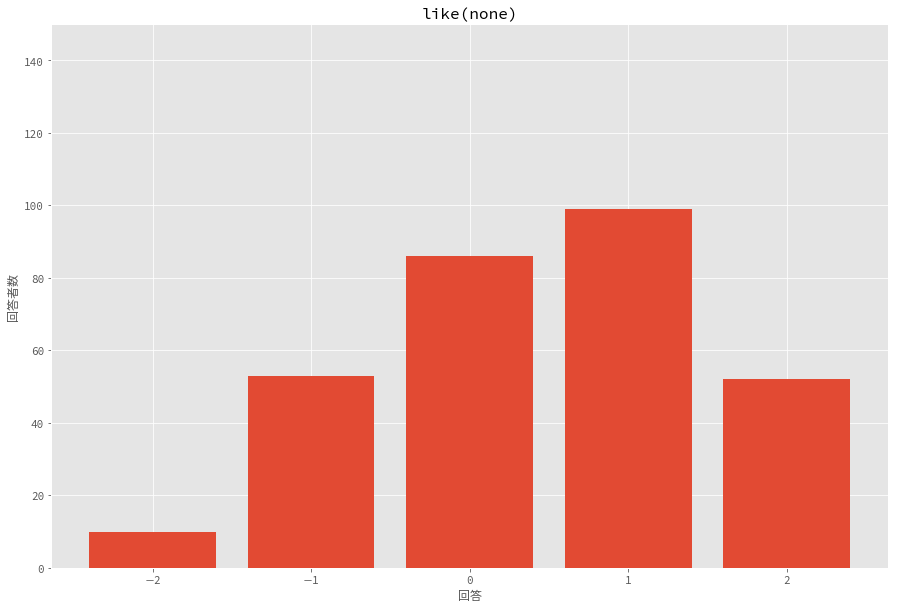

In [8]:
plt.clf()
# plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i, e_item in enumerate(e_items):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    w = 0.2
    y = nones.groupby(e_item).size()
    x = list(y.index)
    ax.bar(x, y)
    ax.set_title('%s' % e_item)
    ax.set_ylabel('回答者数')
    ax.set_xlabel('回答')
    ax.set_ylim([0, 150])
plt.show()